In [15]:
from behavior.behIO import behIO
from behavior.plotScale import plotScale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Set up an experiment
mus = behIO('LR8', '180731', [1, 2, 3])
mus.setDir('/Volumes/User Folders/Trent/MixedValenceBehavior')
#mus.setDir('/Users/Amelia/Documents/hakan/behavior')

Base directory is set to /Volumes/User Folders/Trent/MixedValenceBehavior


In [20]:
# Load ML and NIDAQ data
mus.loadBHV()
mus.loadRuns('nidaq')

All runs will be loaded.
Finished loading ML data.

All runs will be loaded.
Finished loading run(s).



In [21]:
# Get trial info, onsets and offsets for each event
mus.setRun(run= 1) # Set the target run
mus.getTrials()
mus.getNidaq(clean= True)
mus.findOnsets()
mus.getOnsets()
Fs = mus.getFs()

In [22]:
# Set the trial basics
preITI = 2.0 #sec
postITI = 6.0 #sec
time = np.linspace(-preITI, postITI, (postITI+preITI) * mus.nidaq.Fs)

/Users/Amelia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


In [23]:
# Find the visual stim onsets and so we will organize the data around the vis stim onsets

# Trial bins
mus.onsetMatrix['trialnum'] = pd.Series(np.zeros(len(mus.onsetMatrix['timestamps']), dtype= int), dtype= int)
mus.onsetMatrix['time'] = pd.Series(np.zeros(len(mus.onsetMatrix['timestamps']), dtype= int), dtype= int)
mus.onsetMatrix['condition'] = pd.Series(np.zeros(len(mus.onsetMatrix['timestamps']), dtype= int), dtype= int)
mus.onsetMatrix['trialerrors'] = pd.Series(np.zeros(len(mus.onsetMatrix['timestamps']), dtype= int), dtype= int)

visOnsets = mus.pulseOnsets['visual_stimulus']['onsetInd'].values
bins = np.reshape(np.concatenate([visOnsets - preITI*Fs, visOnsets + postITI*Fs]), (2, visOnsets.size)).transpose().astype(int)

for i in range(0, len(bins)):
    begin = bins[i,:][0]
    end = bins[i,:][1]
    
    # add the trial number
    mus.onsetMatrix['trialnum'].iloc[begin : end] = mus.bhv['trialnum'].loc[i]
    
    # add the offset time
    mus.onsetMatrix['time'].iloc[begin : end] = time
    
    # add the conditions
    mus.onsetMatrix['condition'].iloc[begin : end] = mus.bhv['conditions'].loc[i]
    
    # add the trial errors
    mus.onsetMatrix['trialerrors'].iloc[begin : end] = mus.bhv['trialerrors'].loc[i]
    
onsets = mus.onsetMatrix[mus.onsetMatrix['trialnum'] > 0].reset_index(drop= True)

In [24]:
# Do the same to offsets

# Trial bins
mus.offsetMatrix['trialnum'] = pd.Series(np.zeros(len(mus.offsetMatrix['timestamps']), dtype= int), dtype= int)
mus.offsetMatrix['time'] = pd.Series(np.zeros(len(mus.offsetMatrix['timestamps']), dtype= int), dtype= int)
mus.offsetMatrix['condition'] = pd.Series(np.zeros(len(mus.offsetMatrix['timestamps']), dtype= int), dtype= int)
mus.offsetMatrix['trialerrors'] = pd.Series(np.zeros(len(mus.offsetMatrix['timestamps']), dtype= int), dtype= int)

visOnsets = mus.pulseOnsets['visual_stimulus']['onsetInd'].values
bins = np.reshape(np.concatenate([visOnsets - preITI*Fs, visOnsets + postITI*Fs]), (2, visOnsets.size)).transpose().astype(int)

for i in range(0, len(bins)):
    begin = bins[i,:][0]
    end = bins[i,:][1]
    
    # add the trial number
    mus.offsetMatrix['trialnum'].iloc[begin : end] = mus.bhv['trialnum'].loc[i]
    
    # add the offset time
    mus.offsetMatrix['time'].iloc[begin : end] = time
    
    # add the conditions
    mus.offsetMatrix['condition'].iloc[begin : end] = mus.bhv['conditions'].loc[i]
    
    # add the conditions
    mus.offsetMatrix['trialerrors'].iloc[begin : end] = mus.bhv['trialerrors'].loc[i]
    
offsets = mus.offsetMatrix[mus.offsetMatrix['trialnum'] > 0].reset_index(drop= True)

In [25]:
#### END ####

In [26]:
colors = ['Green', 'Blue', 'Red', 'Grey']

stylish = {'axes.axisbelow': False,
 'axes.edgecolor': '1',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': False,
 'axes.spines.left': False,
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'font.size': 14,
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': False,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False}

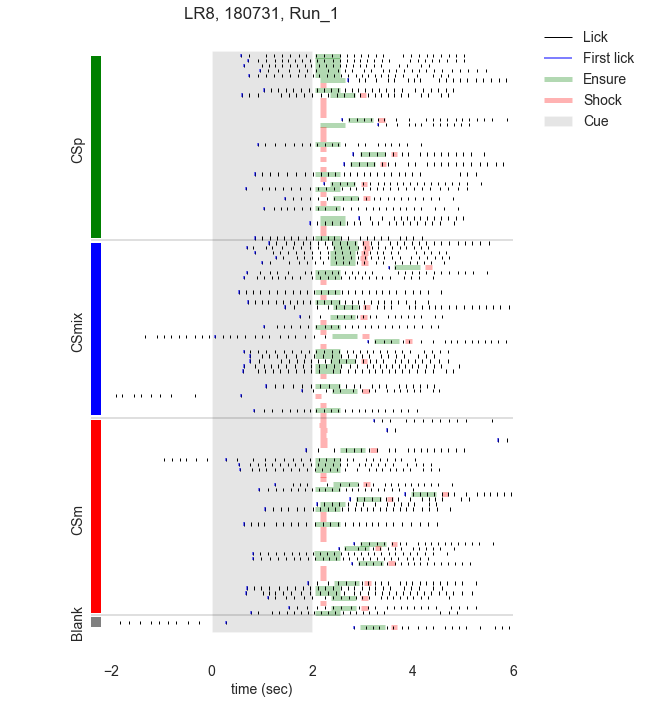

In [27]:
import seaborn as sns
from matplotlib.patches import Rectangle

firstShock = False
firstLicks = True
conditions = set(onsets.condition)

# First organize and sort the data according to trial condition and trial error
#events = onsets.pivot_table(index= ['condition', 'trialnum'], columns= 'time')
events = onsets.pivot_table(index= ['condition', 'trialnum', 'trialerrors'], columns= 'time').sort_index(level= [0, 2])
licks = np.array(events['licking'].values * time)
shocks = np.array(events['shock'].values * time)
ensure = np.array(events['ensure'].values * time)

#eventsOff = offsets.pivot_table(index= ['condition', 'trialnum'], columns= 'time')
eventsOff = offsets.pivot_table(index= ['condition', 'trialnum'], columns= 'time')
shocksOff = np.array(eventsOff['shock'].values * time)
ensureOff = np.array(eventsOff['ensure'].values * time)

sns.set_style(stylish)
fig, ax = plt.subplots(figsize= (7.5, 10))

for i in range(0, licks.shape[0]):
    # Plot reward
    if len(ensure[i,:][ensure[i,:] > 0]) > 0:
        #ensureLine = ax.vlines(ensure[i,:][ensure[i,:] != 0][0], i-0.35, i+0.35, linewidth= 1, color='g', alpha= 0.3, label= 'Ensure')
        #ensureLine = ax.hlines(i, ensure[i,:][ensure[i,:] != 0][0], ensureOff[i,:][ensureOff[i,:] != 0][0], linewidth= 5, color='g', alpha= 0.3, label= 'Ensure')
        if ~len(ensureOff[i,:][ensureOff[i,:] != 0]):
            ensureLine = ax.hlines(i, ensure[i,:][ensure[i,:] != 0][0], ensure[i,:][ensure[i,:] != 0][0]+0.5, linewidth= 5, color='g', alpha= 0.3, label= 'Ensure')
        else:
            ensureLine = ax.hlines(i, ensure[i,:][ensure[i,:] != 0][0], ensureOff[i,:][ensureOff[i,:] != 0][0], linewidth= 5, color='g', alpha= 0.3, label= 'Ensure')
    # Plot shocks
    if firstShock:
        shockLines = ax.vlines(shocks[i,:][shocks[i,:] != 0][0], i-0.35, i+0.35, linewidth= 1, color='r', alpha= 0.3, label= 'Shock')
    else:
        if len(shocks[i,:][shocks[i,:] != 0]) > 0:
            #shockLines = ax.vlines(shocks[i,:][shocks[i,:] != 0], i-0.35, i+0.35, linewidth= 1, color='y', alpha= 0.4)
            shockLines = ax.hlines(i, shocks[i,:][shocks[i,:] != 0][0], shocks[i,:][shocks[i,:] != 0][-1], linewidth= 5, color='r', alpha= 0.3, label= 'Shock')
    # Plot licks
    lickLines = ax.vlines(licks[i,:][licks[i,:] != 0], i-0.35, i+0.35, linewidth= 1, color='k', label= 'Lick')
    # Mark the first lick
    if firstLicks:
        firstLick = licks[i,:][licks[i,:] != 0]
        if len(firstLick[firstLick > 0]) > 0:
            firstLickLine = ax.vlines(firstLick[firstLick > 0][0], i-0.35, i+0.35, linewidth= 2, color='b', alpha= 0.5, label= 'First lick')
    
ax.invert_yaxis()
ax.set_xlim([-preITI - 2, postITI])
ax.set_yticks([])
ax.set_xticks(np.arange(-preITI, postITI + 0.1, 2))
ax.set_xlabel('time (sec)')


width = 0.2
count = 0
for con in conditions:
    trials = events.loc[con].shape[0]
    
    # A lot of effort to set the label
    centerx = -preITI - width*4
    centery = count + trials/2
    if mus.bhv.codes[con].split("_")[0] == 'CSmix':
        ylabel = mus.bhv.codes[con].split("_")[0]
    elif mus.bhv.codes[con].split("_")[0] == 'Blank':
        ylabel = mus.bhv.codes[con].split("_")[0]
    else:
        ylabel = mus.bhv.codes[con].split("_")[1]
    ax.text(centerx, centery, ylabel, rotation= 'vertical', va= 'center')
    
    if count > 0:
        ax.hlines(count-0.5, -preITI - width*2, postITI, linewidth= 0.25)
        
    rect = Rectangle((-preITI - width*2, count), width, trials-1, linewidth= 0, facecolor= colors[con-1])
    count = count + trials
    ax.add_patch(rect)

cueBox = Rectangle((0, -1), 2, count+1, alpha= 0.2, facecolor= 'Grey' , label= 'Cue')
ax.add_patch(cueBox)

ax.set_title(mus.mouse + ', ' + mus.date + ', Run_' + str(mus.run))

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles=[lickLines, firstLickLine, ensureLine, shockLines, cueBox], frameon=False, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()


In [14]:
# Save the figure
fig.savefig(mus.savePath('licks', 'pdf'), bbox_extra_artists=(legend,), bbox_inches='tight')

In [ ]:
plt.figure(figsize= (15,5))
plt.plot(mus.spikes['timestamps'], mus.nidaq['visual_stimulus'])
plt.plot(mus.spikes['timestamps'], mus.spikes['visual_stimulus'], '.')
#plt.xlim([12.8, 13.2])
plt.xlim([0, 30])


In [ ]:
on=mus.pulseOnsets['visual_stimulus'].copy()
on

In [ ]:
a=on['offsets']-on['onsets']


In [ ]:

for k in conditions:
    licksProb = onsets[onsets['condition'] == k].pivot_table(index= ['condition', 'trialnum'], columns= 'time', values= 'licking').values * time
    plt.figure()
    n, bins, patches = plt.hist(licksProb[licksProb != 0], bins= 50, density=False, facecolor=colors[k-1], alpha=0.75)
    plt.xlim([-preITI, postITI])
    plt.ylim([0, 50])

In [ ]:
for k in conditions:
    licksProb = onsets[onsets['condition'] == k].pivot_table(index= ['condition', 'trialnum'], columns= 'time', values= 'licking').values * time
    plt.figure()
    plt.plot(time, np.mean(licksProb, axis= 0), color= colors[k-1])
    #plt.xlim([-preITI, postITI])
    plt.xlim([1, 1.2])

In [ ]:
import scipy.stats as stat

bin_means, bin_edges, binnumber  = stat.binned_statistic(time, licksProb, statistic='mean', bins=10, range=None)

plt.plot(bin_means, bin_edges[1,:])

In [ ]:
bin_means.shape
bin_edges[:-1]

In [ ]:
import seaborn as sns
from matplotlib.patches import Rectangle

firstShock = False
firstLicks = True
conditions = set(onsets.condition)

# First organize
events = onsets.pivot_table(index= ['condition', 'trialnum'], columns= 'time')
licks = np.array(events['licking'].values * time)
shocks = np.array(events['shock'].values * time)
ensure = np.array(events['ensure'].values * time)

eventsOff = onsets.pivot_table(index= ['condition', 'trialnum'], columns= 'time')
shocksOff = np.array(eventsOff['shock'].values * time)
ensureOff = np.array(eventsOff['ensure'].values * time)

sns.set_style(stylish)
fig, ax = plt.subplots(figsize= (10, 15))

width = 0.2
count = 0
for con in conditions:
    trials = events.loc[con].shape[0]
    
    ax.plot(time, events['licking'].values)
    
    # A lot of effort to set the label
    centerx = -preITI - width*4
    centery = count + trials/2
    if mus.bhv.codes[con].split("_")[0] == 'CSmix':
        ylabel = mus.bhv.codes[con].split("_")[0]
    elif mus.bhv.codes[con].split("_")[0] == 'Blank':
        ylabel = mus.bhv.codes[con].split("_")[0]
    else:
        ylabel = mus.bhv.codes[con].split("_")[1]
    ax.text(centerx, centery, ylabel, rotation= 'vertical', va= 'center')
    
    if count > 0:
        ax.hlines(count-0.5, -preITI - width*2, postITI, linewidth= 0.25)
        
    #ax.invert_yaxis()
    #ax.set_xlim([-preITI - 2, postITI])
    #ax.set_yticks([])
    #ax.set_xticks(np.arange(-preITI, postITI + 0.1, 2))
    #ax.set_xlabel('time (sec)')

    #rect = Rectangle((-preITI - width*2, count), width, trials-1, linewidth= 0, facecolor= colors[con-1])
    #count = count + trials
    #ax.add_patch(rect)

#cueBox = Rectangle((0, -1), 2, count+1, alpha= 0.2, label= 'Cue')
#ax.add_patch(cueBox)

#ax.set_title(mus.mouse + ', ' + mus.date + ', Run_' + str(mus.run))

#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles=[lickLines, firstLickLine, ensureLine, shockLines, cueBox], frameon=False, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
import seaborn as sns
from matplotlib.patches import Rectangle

conditions = set(onsets.condition)

events = onsets.pivot_table(index= ['condition', 'trialnum'], columns= 'time')
ev = np.array(events['licking'].values * time)

sns.set_style(stylish)
fig, axes = plt.subplots(len(conditions), 1, sharex= 'all', figsize= (14,8))

width = 0.2
count = 0
for i in conditions:
    trials = events.loc[i].shape[0]
    for ind in range(count, count + trials):
        axes[i-1].vlines(ev[ind,:][ev[ind,:] != 0], ind-0.35, ind+0.35, linewidth= 1, color='k')

    axes[i-1].set_xlim([-preITI - 2, postITI])
    axes[i-1].set_yticks(np.linspace(count, count + trials, 4))
    axes[i-1].set_yticklabels([])
    axes[i-1].set_ylim([count, count + trials])
    axes[i-1].invert_yaxis()
    
    # A lot of effort to set the label
    if mus.bhv.codes[i].split("_")[0] == 'CSmix':
        axes[i-1].set_ylabel(mus.bhv.codes[i].split("_")[0])
    elif mus.bhv.codes[i].split("_")[0] == 'Blank':
        axes[i-1].set_ylabel(mus.bhv.codes[i].split("_")[0])
    else:
        axes[i-1].set_ylabel(mus.bhv.codes[i].split("_")[1])

    rect = Rectangle((-preITI - width*2, count-1), width, trials+1, linewidth= 0, facecolor= colors[i-1])
    axes[i-1].add_patch(rect)
    
    count = count + trials

    #cueBox = Rectangle((0, 0), 2, count, alpha= 0.25)
    #axes[i].add_patch(cueBox)

axes[i-1].set_xticks(np.arange(-preITI, postITI + 0.1, 2))
axes[i-1].set_xlabel('time (sec)')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.01)


In [35]:
a={'a':{1:2,3:4},'b':{5:1,6:2}}
a['a'][3]

4

In [56]:
dd = ['12','13','14','15']
rr = [1,2,3]

X = {}
for d in dd:
    temp = {}
    for r in rr:
        temp[r] = (i, k)
    X[d] = temp

In [65]:
A.a = {}

NameError: name 'A' is not defined

In [69]:
filePath = 'bh8v'
if filePath not in ['bhv', 'nidaq', 'running', 'eye', 'cam', 'all']:
    print 5

5


In [70]:
a={}
len(a)

0